<table style="width: 100%; border-style: none">
<tr style="border-style: none; background-color: #82a8cf">
<td style="border-style: none; width: 1%; text-align: left; font-size: 16px; color: #ffffff">Institut f&uuml;r Theoretische Physik<br /> <font color="#e6e6e6">Universit&auml;t zu K&ouml;ln </font></td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px; color: #ffffff">Prof. Dr. Simon Trebst<br /> <font color="#e6e6e6"> Theo Haas </font> </td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 10px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Übungsblatt 6</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2025</h3>

**Website:** <a href="https://www.thp.uni-koeln.de/trebst/Lectures/2025-CompPhys.shtml" style="color:#82a8cf; text-decoration: underline;text-decoration-style: dotted;">https://www.thp.uni-koeln.de/trebst/Lectures/2025-CompPhys.shtml</a>

**Abgabe:** <span style="color:#82a8cf"> 12.05.2025, 12:00 Uhr </span> <span style="float:right;">**Besprechung**: 14.05.2025 - 16.05.2025.</span>

**Name:** <span style="color:#82a8cf"> Bitte geben Sie Ihren Namen an.  </span>
<hr>

<hr style="height:.3px"> 

<span style="color:#606060; font-weight:bold; font-size:20px"> Aufgaben auf Übungsblatt 6</span>
- <span style="color:#606060; font-weight:light; font-size:14px"> Aufgabe 13: Simpson- vs. Trapezregel [10 Punkte] </span>
- <span style="color:#82a8cf; font-weight:bold; font-size:16px"> Aufgabe 14: Sortieren, Skalieren und Animieren [10 Punkte]</span>
- <span style="color:#606060; font-weight:light; font-size:14px"> Aufgabe 15 (Bonus): Stau aus dem Nichts [12 Bonus-Punkte] </span>
<hr style="height:.3px"> 

<table style="border-style: none; width: 100%; background-color: #FFFFFF"><tr style="border-style: none;">
<td style="border-style: none; width:3%; text-align: left; font-size: 25px; font-weight: 200;background-color: #FFFFFF">Aufgabe 14: Sortieren, Skalieren und Animieren </td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 15px;background-color: #FFFFFF">[10 Punkte]</td></tr></table>

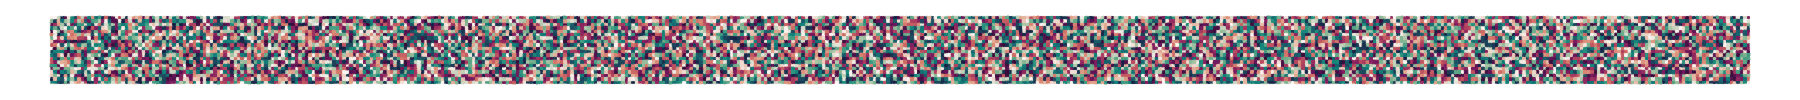

In dieser Aufgabe behandeln wir zwei unterschiedliche Thematiken am Beispiel von Sortieralgorithmen. 
Zunächst beschäftigen wir uns erneut mit dem in der Vorlesung "Programmiertechniken 3" eingeführten Konzept der *Komplexität von Algorithmen*. Darunter versteht man die Skalierung der Laufzeiten (besser: die Anzahl der nötigen Schritte für den erfolgreichen Durchlauf des Algorithmus) mit der Größe der Eingangsvariable, bei Sortieralgorithmen also die Entwicklung der nötigen Vergleiche und Vertauschungen mit der Länge des zu sortierenden Arrays. Anschließend sollen Sie beim Animieren verschiedene Sortieralgorithmen erste Erfahrungen im Umgang mit `Observable`n sammeln, dem Datentypen der hinter der ausgereiften Interaktivität von Makie steckt. **Beachten Sie, dass Sie den Animationsteil auch bearbeiten können, wenn Sie in der ersten Hälfte der Aufgabe auf Probleme stoßen.**

## a) Sortieren mit Gnomen
In der untenstehenden Zelle ist die Funktion `swapentry!`, die Sie auch schon in der Vorlesung genutzt haben, implementiert. Diese Funktion vertauscht in dem zu übergebenden Array `a` die Einträge an den ebenfalls zu übergebenden Indizes `i` und `j` und bildet den zentralen Baustein der Sortieralgorithmen.

In [ ]:
# a = Vektor von Zahlen, tausche Eintrag i gegen Eintrag j
function swapentry!(a,i,j)
    tmp = a[i]
    a[i] = a[j]
    a[j] = tmp
    return a
end

### Bubblesort
In der Vorlesung haben Sie den Bubblesort-Algorithmus kennengelernt. Idee ist, das zu sortierende Array von links nach rechts zu durchlaufen und in jedem Schritt das aktuelle Element mit seinem rechten Nachbarn zu vergleichen. Ist das aktuelle Element größer, tauschen beide Elemente den Platz. Am Ende des ersten Durchlaufs steht das größte Element rechts und der Durchlauf beginnt links erneut. Diesmal muss das Element ganz rechts nicht mehr beachtet werden, da dort bereits das größte Element steht. Am Ende des zweiten Durchlaufs ist dann auch das zweitgrößte Element korrekt einsortiert. Dieses Verfahren wird so lange wiederholt, bis das gesamte Array sortiert ist. Untenstehend finden Sie die Implementierung der Funktion `bubblesort` aus der Vorlesung. Vollziehen Sie nach, wie das oben beschriebene Verfahren umgesetzt wurde und kommentieren Sie die einzelnen Schritte.

In [ ]:
# Bubblesort
function bubblesort!(a)
        
    for last = length(a):-1:2
        for j in 1:last-1

            if a[j] > a[j+1]
                swapentry!(a, j, j+1)
            end         

        end
    end
    
    return nothing
end

### Gnomesort

Als zweites Sortierverfahren sollen Sie das Gnomesort-Verfahren (auch als Stupid Sort bekannt) implementieren. Um den Algorithmus zu verstehen, stelle man sich einen Gartenzwerg (gnome) vor, der vor einer Reihe Blumentöpfen unterschiedlicher Größe steht. Der Gartenzwerg will die Töpfe der Größe nach sortieren und startet dazu ganz links. Er geht dann wie folgt vor: 
- Er vergleicht den Blumentopf an seiner aktuellen Position mit dem Blumentopf rechts. 
- Sind diese beiden Blumentöpfe in der richtigen Reihenfolge, dann geht der Zwerg einen Schritt nach rechts. 
- Wenn die Reihenfolge nicht stimmt, dann vertauscht er die beiden Blumentöpfe und geht einen Schritt nach links.
- Wenn er nicht nach links gehen kann weil er an Position 1 steht, dann geht er nach rechts.
Diese Schritte wiederholt er so lange, bis er bei dem Blumentopf ganz rechts angekommen ist. Dann stehen die Töpfe in der richtigen Reihenfolge.

Übersetzen Sie die Beschreibung des Sortiervorganges in eine Funktion `gnomesort!`, die ein Array `a` übergeben bekommt und dieses sortiert. Testen Sie Ihre Implementierung in der übernächsten Zelle.

In [ ]:
# Gnomesort
function gnomesort!(a) 
    ################################
    # Ergänzen Sie hier Ihren Code #
    ################################
end     

In [ ]:
a = rand(2000)
gnomesort!(a)
issorted(a)

### Skalierung der Algorithmen
Jetzt sollen Sie untersuchen, wie die Laufzeit von `gnomesort!` mit der Größe des zu sortierenden Arrays skaliert. Gehen Sie dazu analog zur Vorlesung "Programmiertechniken 3" vor und sortieren Sie Arrays der Größe $2^x$, mit $x \in \left[ 2, \dots, 16 \right]$. Tragen Sie die Laufzeit als Funktion der Anzahl der Arrayelemente auf einer sinnvoll gewählten Skala auf und vergleichen Sie das Ergebnis mit `bubblesort!` und der Julia-Funktion `sort!`. Beschriften Sie die Achsen und fügen Sie eine Legende hinzu.

## b) Animieren der Algorithmen mit GLMakie
Eine der großen Stärken von Makie ist die Möglichkeit, interaktive und animierte Graphiken zu erzeugen. In diesem zweiten Teil der Aufgabe sollen Sie das Konzept von `Observable`n, dem hierfür wichtigen Datentypen, schrittweise ausprobieren und am Ende die oben implementierten Vertauschungsalgorithmen visualisieren. Das Konzept der `Observable`n stellen wir ausführlich im [zweiten Teil der Video-Tutorials](https://www.thp.uni-koeln.de/trebst/Lectures/2025-CompPhys.shtml#Programmiertechniken) vor (die zur Bearbeitung dieser Aufgabe relevanten Informationen werden in der ersten Hälfte des Videos diskutiert).

In [ ]:
using GLMakie, Random

### Observable
Eine Observable ist ein Datentyp, der einen bestimmten Wert trägt. Zum Beispiel ist `O = Observable(1)` eine Observable, die den Wert 1 trägt. Erzeugen Sie die folgenden Observablen und lassen Sie sich den Typen mittels des Befehls `typeof` anzeigen:
- Eine Observable, deren Wert das Array `[1,2,3,4]` ist.
- Eine Observable, deren Wert vom Typ `Float64` ist.
- Eine Observable, deren Wert `:red` ist.

Die Werte von Observablen lassen sich mittels `[]` ansprechen und ändern. Zum Beispiel kann ich den Wert des oben definierten `O` mittels `O[] = 100` auf 100 setzen. Ändern Sie jeweils einmal die Werte der Observablen, die Sie soeben erzeugt haben. Was passiert, wenn Sie den Wert der ersten Observablen von `[1,2,3,4]` auf `[1,2,3,4.1]` verändern wollen?

Bisher scheinen `Observable` nur eine Art Hülle für die schon bekannten Datentypen zu sein. Um die Besonderheit von `Observable`n zu demonstrieren sollen Sie jetzt folgenden Plot erstellen: Erzeugen Sie in einer `Figure` zwei Achsenumgebungen (`Axis`) nebeneinander. Erzeugen Sie anschließend
- ein Array `a` bestehend aus 20 zufälligen Zahlen,
- eine Observable `aO`, deren Wert ein Array aus 20 zufälligen Zahlen ist.

Stellen Sie mittels eines `scatterlines!`-Plots in der linken Achsenumgebung das Array, und in der rechten Achsenumgebung die `Observable` dar. Denken Sie an den Befehl `display(Name_der_Figure)` um das Fenster mit der Abbildung zu erzeugen.

Überschreiben Sie in der nächsten Zelle die Variable `a` mit einem neuen Array aus 20 zufälligen Zahlen, sowie den Wert der Observablen `aO` mittels `aO[] = ...`, ebenfalls mit einem neuen Array aus Zufallszahlen. Wie ändert sich der Plot?

Nutzen Sie Ihre Beobachtungen, um ein etwas komplexeres Beispiel zu implementieren: Visualisieren Sie wie oben eine Observable, deren Wert ein Array aus Zufallszahlen ist. Benutzen Sie zwei weitere Observable, um die Farbe und die Liniendicke festzulegen. Lassen Sie sich das Bild anzeigen und ändern Sie in einer separaten Zelle des Notebooks die Eigenschaften des Plots, indem Sie die Werte der Observablen überschreiben.

Was Sie jetzt gelernt haben genügt, um eine erste Minianimation zu erzeugen. Dazu brauchen wir noch den Befehl `sleep(t)`, der dazu führt, dass das Programm für eine Dauer von `t` Sekunden pausiert. Kombinieren Sie eine `for`-Schleife und die `sleep`-Funktion um eine Animation zu erzeugen, bei der sich die im obigen Plot dargestellte Observable in Abständen von 0.1 Sekunden insgesamt 100 mal ändert.

### Animation der Sortieralgorithmen
Ähnlich zur Vorlesung "Programmiertechniken 3" wollen wir jetzt Bubblesort und Gnomesort animieren, diesmal jedoch (anders als in der Vorlesung) auf das Konzept von Observablen zurückgreifen. In der untenstehenden Zelle finden Sie eine Funktion `swapentryO(a, i, j)`, die im zur Observablen `a` gehörendem Array `a[]` die Elemente `i` und `j` vertauscht. 
Sie sollen jetzt die Funkton `bubblesortO!` vervollständigen, der eine Observable `a` übergeben werden kann. Die Funktion soll das zur Observable `a` gehörende Array `a[]` sortieren. Dazu müssen Sie die oben vorgegebene Funktion `bubblesort!` lediglich leicht anpassen. 
Für die Animation ist es außerdem wichtig, dass Sie an die entsprechenden Stellen der Funktion noch `sleep` Befehle schreiben, um den Aufwand der Elementvergleiche und der Vertauschungen zu simulieren. Konkret soll die Funktion immer 0.1 Sekunden pausieren, wenn zwei Elemente verglichen und vertauscht werden, und 0.02 Sekunden, wenn nach dem Vergleich *nicht* vertauscht wird. 

In [ ]:
function swapentryO!(a::Observable, i, j)
    swapentry!(a[], i, j) # Vertausche Elemente im Wert der Observablen
    notify(a)             # Mache Observable auf Änderung aufmerksam (eigentlich nur a[] = a[][])
    return
end

function bubblesortO!(a::Observable)
    ################################
    # Ergänzen Sie hier Ihren Code #
    ################################
end

function gnomesortO!(a)
    ################################
    # Ergänzen Sie hier Ihren Code #
    ################################
end

In untenstehender Zelle wird ein zufällig durchgewürfeltes Array `a`, das alle ganzen Zahlen von 1 bis 30 enthält an eine Observable `aO` übergeben und mittels eines `barplot!`s dargestellt. Animieren Sie den Bubblesort-Algorithmus, in dem Sie in einer separaten Zelle mittels der Funktion `bubblesortO!` die Observable `aO` sortieren.

Wiederholen Sie die obigen Schritte auch für den Algorithmus `gnomesort!`.

In [ ]:
fig = Figure()
ax = Axis(fig[1,1])

a = shuffle(1:30)
aO = Observable(a)

barplot!(aO, color = aO)

hidedecorations!(ax)
hidespines!(ax)

display(fig)

### Optional: Weitere Features implementieren
Schmücken Sie die obenstehende Animation noch etwas aus. Hier sind ein paar Ideen: Stellen Sie etwa immer die beiden Elemente, die gerade verglichen werden in einer anderen Farbe dar. Sie können auch noch [weitere Sortieralgorithmen](https://de.wikipedia.org/wiki/Sortierverfahren) implementieren und diese gegeneinander antreten lassen. Fügen Sie in dem Fall auch einen Startbutton hinzu, so dass Sie die Sortierung durch Knopfdruck starten können. Implementieren Sie ein Menü, in dem Sie aus verschiedenen Algorithmen auswählen können. Lassen Sie ein zweidimensionales Array spaltenweise sortieren, etc....  

*Hinweis:* Werfen Sie einen Blick auf die Video-Tutorials. Geben Sie ihre Ergebnisse **nicht** ab. Diese Vorschläge sind Bonus und gehen weit über das hinaus, was wir von Ihnen zu diesem Zeitpunkt erwarten.